In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sequencer import *
import time

init_sequencer()

MUPPET1_SEQUENCER_TEST
SPI access okay


In [3]:
# this clears the working memory for pulses
clear_pulses()

set_cycle_period("1000m")

program_sequencer()

# disable test pulser
for i in range(4):
    enable_test_pulser(i)

In [4]:
##################################################
##             show me the scalers              ##
##################################################

for ch in range(4):
    print("CH{} rate: {:8.1f} Hz".format(ch,read_tdc_scaler_rate_hz(ch)))

CH0 rate: 266202.6 Hz
CH1 rate: 266209.5 Hz
CH2 rate: 266183.7 Hz
CH3 rate: 266169.7 Hz


In [5]:
##################################################
##          record data from ch0 + ch1          ##
##################################################


reset_tdc() # stops tdc, flushes all FIFOS

channels = [0,1]

for ch in channels:
    enable_tdc_chan(ch)
    
enable_tdc()
# time to acquire data
time.sleep(0.1)

disable_tdc()


data = {}

for ch in channels:
    block = slurp_fifo(ch)
    leading_edges, widths = decode_block_to_pulses(block,polarity=1)
    
    data[ch] = {}
    data[ch]["le"]    = leading_edges
    data[ch]["width"] = widths
    



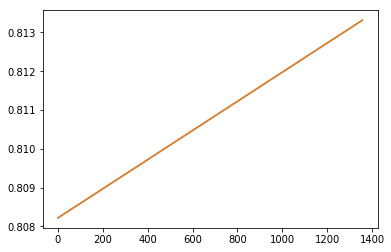

In [6]:
plt.plot(data[0]["le"])
plt.plot(data[1]["le"])

In [7]:
##################################################
##       software trigger on one channel        ##
##################################################
trig_chan = 0

period = 3750e-9
n      = 50

triggered_data = software_trigger(data,
                                trig_chan=0,
                                window_L = -500e-9+period*n,
                                window_R = 500e-9 +period*n
                                 )

stdev: 38.011 ns


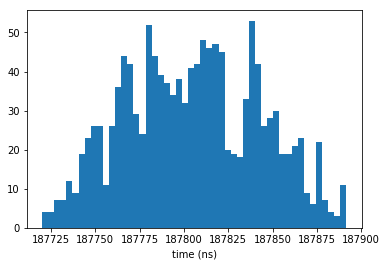

In [16]:
plt.hist(np.array(triggered_data[0]["le"])*1e9, bins=50
         #bins = np.arange(-10,4000,10)
         #bins = np.arange(-10,10000,100)
        )
plt.xlabel("time (ns)")
stdev =    np.std(np.array(triggered_data[0]["le"])*1e9)
print("stdev: {:3.3f} ns".format(stdev))

stdev: 38.008 ns


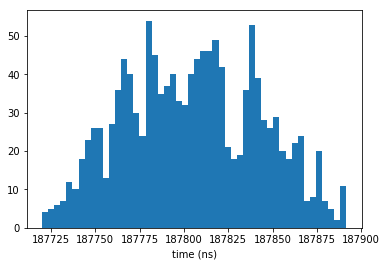

In [17]:
plt.hist(np.array(triggered_data[1]["le"])*1e9,
         bins = 50
         #bins = np.arange(-10,4000,10)
         #bins = np.arange(-10,10000,100)
        )
plt.xlabel("time (ns)")

stdev =    np.std(np.array(triggered_data[1]["le"])*1e9)
print("stdev: {:3.3f} ns".format(stdev))